# Solution for AnalyticsVidhya Time Series Prediction Hackathon using Auto_TS Open Source Package
https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/#About

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

%matplotlib inline

pd.set_option("display.max_rows", 500)

# First make sure you install Auto_TS Package

In [3]:
from auto_ts import auto_timeseries as ATS

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.37. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
df = pd.read_csv("../../data/AirPassengers.csv")

# float型に変換
df["#Passengers"] = df["#Passengers"].astype("float64")
df = df.rename(columns={"#Passengers": "Passengers"})

# datetime型に変換にする
df.Month = pd.to_datetime(df.Month)

# データの中身を確認
df.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


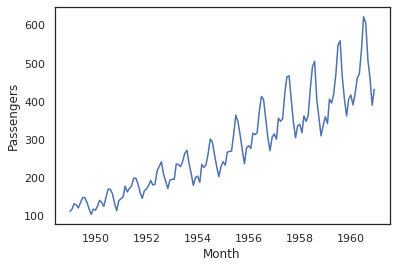

In [5]:
fig, ax = plt.subplots()
a = sns.lineplot(x="Month", y="Passengers", data=df)
plt.show()

In [6]:
# 学習と評価データに分割
df_train = df[df["Month"] < "1957-04-01"]
df_test = df[df["Month"] >= "1957-04-01"]

In [7]:
ts_column = "Month"
orig_target = "Passengers"

In [8]:
score_type = "rmse"
forecast_period = df_test.shape[0]
timeinterval = "M"
non_seasonal_pdq = (2, 1, 2)
seasonality = True
seasonal_periods = 24
sep = ","

In [9]:
automl_model = ATS(
    score_type=score_type,
    time_interval=timeinterval,
    non_seasonal_pdq=None,
    seasonality=True,
    seasonal_period=24,
    model_type=["Prophet", "ML"],
    forecast_period=500,
    verbose=2,
)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      0.8910514348330264      |
|           p-value           |      0.9929724268419942      |
|          #Lags Used         |             13.0             |
| Number of Observations Used |             85.0             |
|     Critical Value (1%)     |     -3.5097356063504983      |
|     Critical Value (5%)     |     -2.8961947486260944      |
|     Critical Value (10%)    |     -2.5852576124567475      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

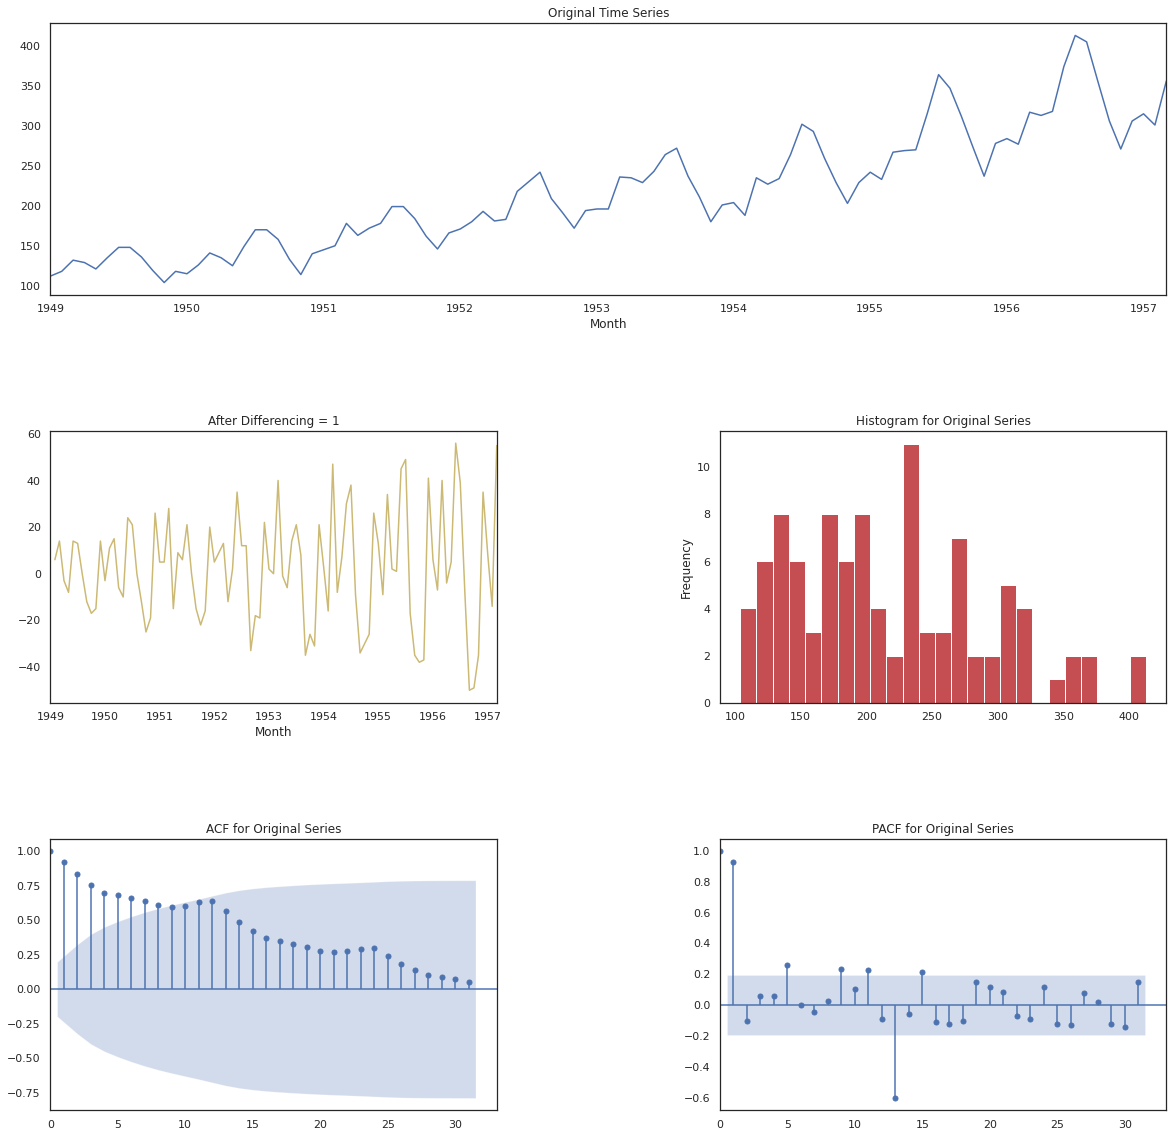

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(99, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=24, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Lowering forecast period to 16 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 19 Test Shape: 16
    Root Mean Squared Error predictions vs actuals = 23.97
    Std Deviation of actuals = 22.68
    Normalized RMSE = 106%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 35 Test Shape: 16
    Root Mean Squared Error predictions vs actuals = 14.00
    Std Deviation of actuals = 22.75
    Normalized RMSE = 62%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 51 Test Shape: 16
    Root Mean Sq

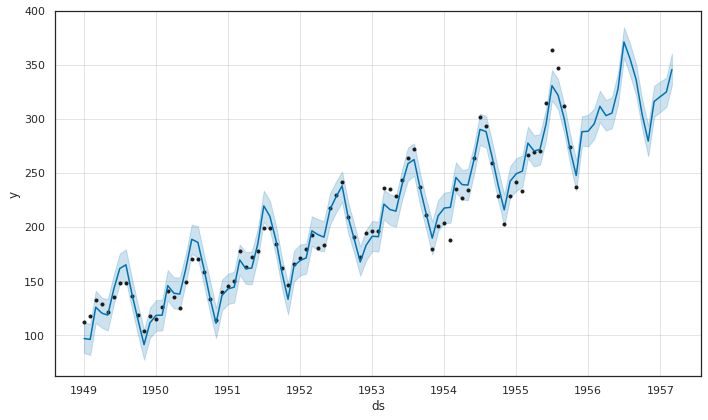

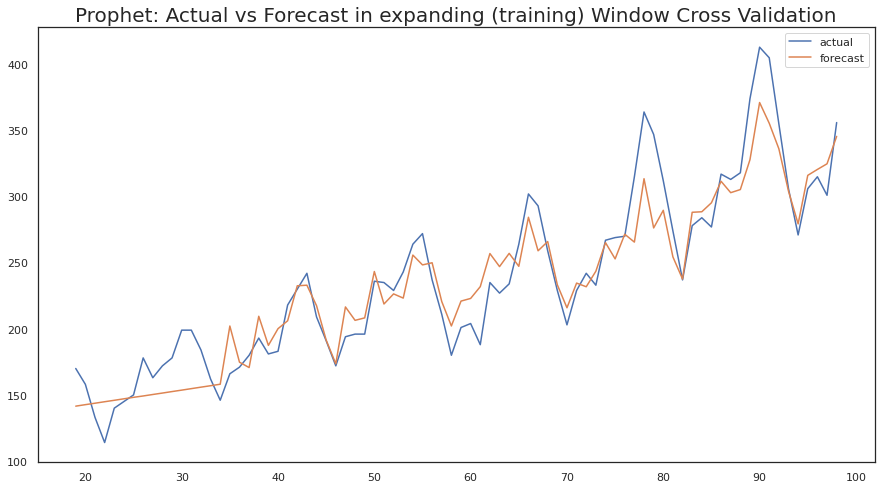

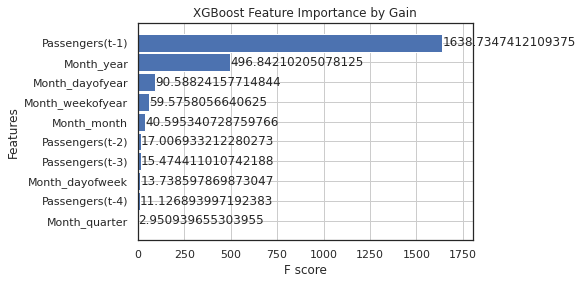

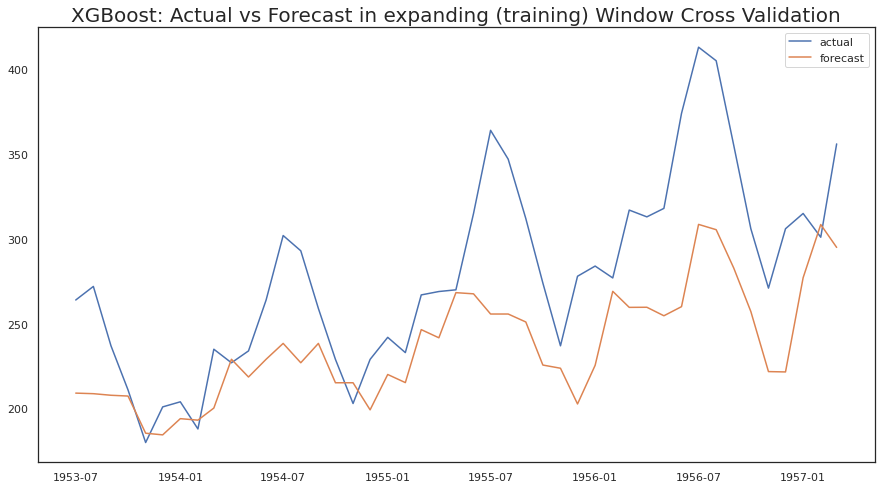

In [10]:
automl_model.fit(df_train, ts_column, orig_target)

In [11]:
pred1 = automl_model.predict(testdata=df_test, model="Prophet", simple=False)[
    "yhat_upper"
]
pred1.shape

Building Forecast dataframe. Forecast Period = 45


(45,)

In [12]:
pred2 = automl_model.predict(testdata=df_test, model="ML", simple=False)["yhat"]
pred2.shape

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed


(45,)